LAB 09  
Eric Zhong and Natasha Lal  
https://github.com/usc-ee250-fall2022/eric-natasha/tree/labML  

In [1]:
import pickle

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
coins = pd.read_csv("coins.csv")
coins.head(10)

,reflectance,weight,denomination
0,24.226059,4.384837,1
1,24.322672,5.014980,1
2,23.527142,4.569030,1
3,26.765469,6.320783,1
4,22.457390,4.954992,1
5,22.912666,5.286136,1
6,23.095557,4.432129,1
7,26.447107,5.660208,1
8,25.152615,5.256971,1
9,25.137096,4.227505,1


<AxesSubplot:xlabel='reflectance', ylabel='weight'>

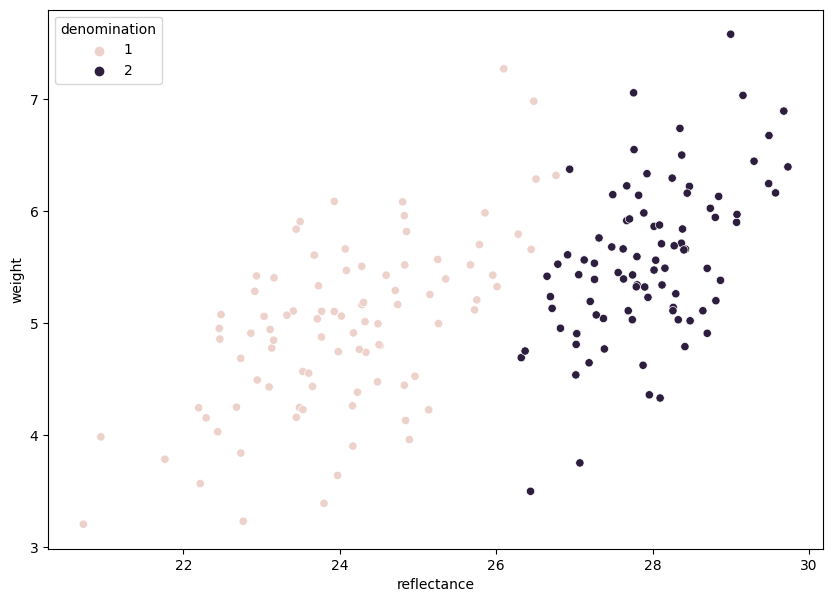

In [3]:
sns.scatterplot(x="reflectance",y="weight",data=coins, hue="denomination")

In [19]:
# test train split
X = coins[["reflectance", "weight"]].to_numpy()
y = coins[["denomination"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
## Import your favourite classifier and train it using the X_train data and hte y_train labels

## make sure you instantiate your classifier and name it clf

## for example, if you are using perceptron, you would do the following - 

# -> from sklearn.linear_model import Perceptron
# -> clf = Perceptron(tol=1e-3, random_state=0)
# .... call fit , etc.
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

c:\Users\21ezh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron()

In [24]:
## test the accuracy of your model
clf.score(X_test, y_test)

0.5277777777777778

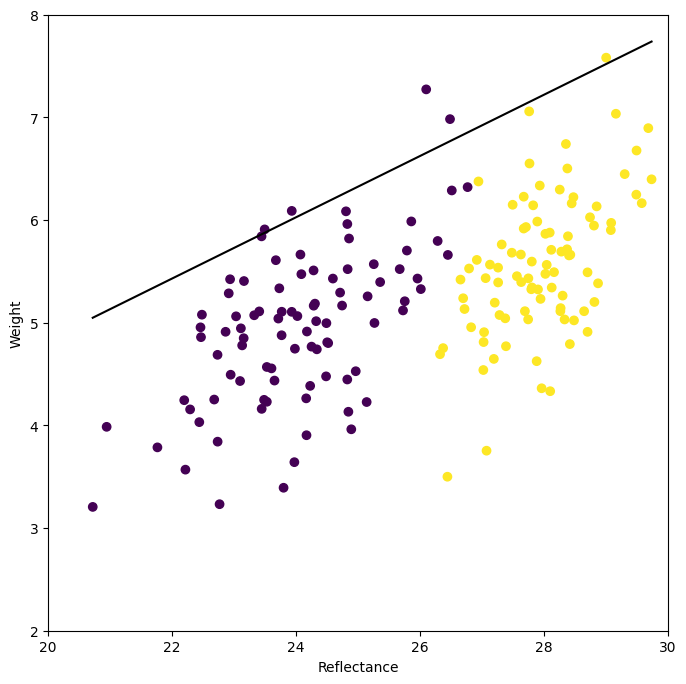

In [25]:
## plot the decision boundary of your classifier along with the scatterplot of the training data
## hint: look at the ann example

w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(min(X[:,0]), max(X[:,0]))
x2 = a*x1 - (clf.intercept_[0])/w[1]

plt.figure(figsize=(8, 8))
ax = plt.axes()
ax.scatter(X[:,0], X[:,1], c = y)
plt.plot(x1, x2, 'k-')
ax.set_xlabel('Reflectance')
ax.set_ylabel('Weight')
ax.set_xlim(20, 30)
ax.set_ylim(2, 8)
plt.show()

In [8]:
## additional stuff you want to add 

In [9]:
# dump your classifier into a pickle file
pickle.dump(clf, open("model.pickle","wb"))